# PCA

In [13]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
training = pd.read_csv('/content/drive/MyDrive/train.csv')
testing = pd.read_csv('/content/drive/MyDrive/test.csv')

In [16]:
training, val = train_test_split(training, test_size=0.1, random_state=42)

In [17]:
training.values.shape

(54000, 785)

In [18]:
testing.values.shape

(5000, 785)

In [19]:
val.values.shape

(6000, 785)

In [20]:
import torch
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [21]:
tr_label = training["label"]
tr_pixel_vals = training.drop("label",axis = 1)

tst_label = testing["id"]
tst_pixel_vals = testing.drop("id", axis = 1)

v_label = val['label']
v_pixel_vals = val.drop("label",axis = 1)

In [22]:
class CustomImageDataset(Dataset):
    def __init__(self, labels, pixel_vals, transform=None, target_transform=None):
        self.labels = labels
        self.pixels = pixel_vals
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        pixel_values = self.pixels[idx].astype(float).reshape(28, 28).astype(np.float32)  # Cast to float32
        label = self.labels[idx]  # Assuming the label is in the second column

        if self.transform:
            pixel_values = self.transform(pixel_values)

        if self.target_transform:
            label = self.target_transform(label)

        return pixel_values[None, :, :], label  # Add an extra dimension for the channel (1)


Train = CustomImageDataset(tr_label, tr_pixel_vals.values)
Test = CustomImageDataset(tst_label, tst_pixel_vals.values)
Val = CustomImageDataset(v_label, v_pixel_vals.values)

In [23]:
train_dataloader = DataLoader(Train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(Test, batch_size=32, shuffle=True)
val_dataloader = DataLoader(Val, batch_size=32, shuffle=False)

In [26]:
eig_val,eig_vec = np.linalg.eig(np.array((training.drop(training.columns[0],axis = 1)).cov()))

In [30]:
'''eig_vec[5]
eig_val'''

'eig_vec[5]\neig_val'

In [29]:
len(list(eig_val))

784

In [31]:
eig_val_contribution = [i/sum(eig_val) for i in eig_val]
x = [i for i in range(len(eig_val))]

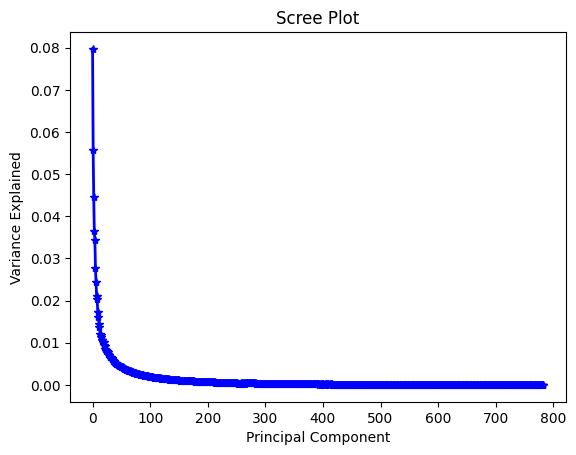

In [32]:
plt.plot(x, eig_val_contribution, '*-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [33]:
sum = 0
count = 0
for i in eig_val_contribution:
    if sum > 0.85:
        break
    sum = sum+i
    count = count + 1
print(f"eigenvalues that contribute {sum} sum is {count}")

eigenvalues that contribute 0.850381370131026 sum is 120


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df=training.drop(training.columns[0],axis = 1).copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [38]:
scaled_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,-0.004611,-0.011383,-0.014602,-0.019156,-0.023446,...,-0.011377,-0.008852,-0.010534,-0.011456,-0.00744,-0.004303,-0.004303,0.0,-0.004303,0.0
1,0.0,0.0,0.0,0.0,0.0,-0.004611,-0.011383,-0.014602,-0.019156,-0.023446,...,-0.011377,-0.008852,-0.010534,-0.011456,-0.00744,-0.004303,-0.004303,0.0,-0.004303,0.0
2,0.0,0.0,0.0,0.0,0.0,-0.004611,-0.011383,-0.014602,-0.019156,-0.023446,...,-0.011377,-0.008852,-0.010534,-0.011456,-0.00744,-0.004303,-0.004303,0.0,-0.004303,0.0
3,0.0,0.0,0.0,0.0,0.0,-0.004611,-0.011383,-0.014602,-0.019156,-0.023446,...,-0.011377,-0.008852,-0.010534,-0.011456,-0.00744,-0.004303,-0.004303,0.0,-0.004303,0.0
4,0.0,0.0,0.0,0.0,0.0,-0.004611,-0.011383,-0.014602,-0.019156,-0.023446,...,-0.011377,-0.008852,-0.010534,-0.011456,-0.00744,-0.004303,-0.004303,0.0,-0.004303,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,0.0,0.0,0.0,0.0,0.0,-0.004611,-0.011383,-0.014602,-0.019156,-0.023446,...,-0.011377,-0.008852,-0.010534,-0.011456,-0.00744,-0.004303,-0.004303,0.0,-0.004303,0.0
53996,0.0,0.0,0.0,0.0,0.0,-0.004611,-0.011383,-0.014602,-0.019156,-0.023446,...,-0.011377,-0.008852,-0.010534,-0.011456,-0.00744,-0.004303,-0.004303,0.0,-0.004303,0.0
53997,0.0,0.0,0.0,0.0,0.0,-0.004611,-0.011383,-0.014602,-0.019156,-0.023446,...,-0.011377,-0.008852,-0.010534,-0.011456,-0.00744,-0.004303,-0.004303,0.0,-0.004303,0.0
53998,0.0,0.0,0.0,0.0,0.0,-0.004611,-0.011383,-0.014602,-0.019156,-0.023446,...,-0.011377,-0.008852,-0.010534,-0.011456,-0.00744,-0.004303,-0.004303,0.0,-0.004303,0.0


In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=784)
pca_fit = pca.fit(scaled_df)
pca_fit

PCA(n_components=784)

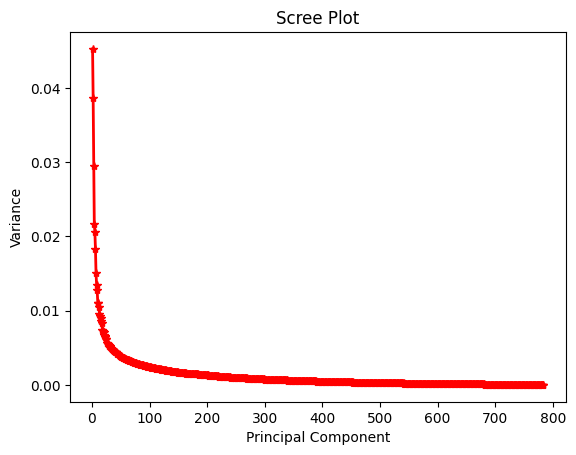

In [40]:
PCAvals = np.arange(pca.n_components_) + 1
plt.plot(PCAvals, pca.explained_variance_ratio_, '*-', linewidth=2, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.show()

In [41]:
desired_variance = 0.9
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
best_n_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"Number of components required to explain {desired_variance*100}% variance = {best_n_components}")

Number of components required to explain 90.0% variance = 326


In [42]:
pca = PCA(n_components=328)
pca_fit = pca.fit(scaled_df)

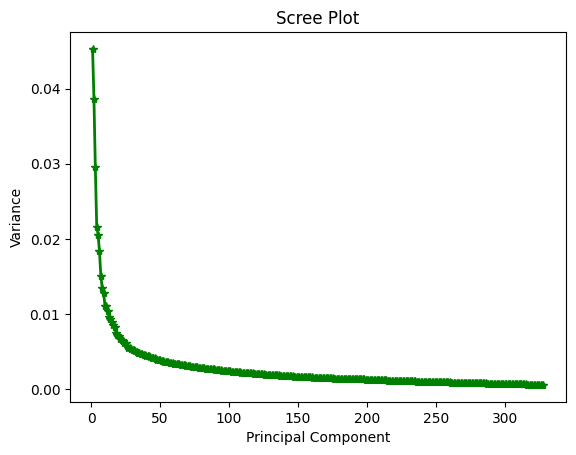

In [43]:
PCAvals = np.arange(pca.n_components_) + 1
plt.plot(PCAvals, pca.explained_variance_ratio_, '*-', linewidth=2, color='green')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.show()

# Autoencoders

In [1]:
import pandas as pd
import numpy as np
import math
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import torch.optim as optim
from torchvision.transforms import ToTensor
import os
from torchvision.io import read_image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [4]:
class CustomImageDataset(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.img_labels = df.iloc[:, 0]
        self.data = df.iloc[:, 1:]
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.tensor(self.data.iloc[idx,:])
        label = self.img_labels.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image,label

In [5]:
class Encoder(nn.Module):
    def __init__(self, n_in, n_hidden_1, n_hidden_2, n_hidden_3, n_out):
        super(Encoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(n_in, n_hidden_1, bias=True),
            nn.BatchNorm1d(n_hidden_1),
            nn.Sigmoid())
        self.layer2 = nn.Sequential(
            nn.Linear(n_hidden_1, n_hidden_2, bias=True),
            nn.BatchNorm1d(n_hidden_2),
            nn.Sigmoid())
        self.layer3 = nn.Sequential(
            nn.Linear(n_hidden_2, n_hidden_3, bias=True),
            nn.BatchNorm1d(n_hidden_3),
            nn.Sigmoid())
        n_size = math.floor(math.sqrt(n_out))
        self.layer4 = nn.Sequential(
            nn.Linear(n_hidden_3, n_out, bias=True),
            nn.BatchNorm1d(n_out),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.layer1(x.float())
        x = self.layer2(x)
        x = self.layer3(x)
        return self.layer4(x)

class Decoder(nn.Module):
    def __init__(self, n_in, n_hidden_1, n_hidden_2, n_hidden_3, n_out):
        super(Decoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(n_in, n_hidden_1, bias=True),
            nn.BatchNorm1d(n_hidden_1),
            nn.Sigmoid())
        self.layer2 = nn.Sequential(
            nn.Linear(n_hidden_1, n_hidden_2, bias=True),
            nn.BatchNorm1d(n_hidden_2),
            nn.Sigmoid())
        self.layer3 = nn.Sequential(
            nn.Linear(n_hidden_2, n_hidden_3, bias=True),
            nn.BatchNorm1d(n_hidden_3),
            nn.Sigmoid())
        n_size = math.floor(math.sqrt(n_out))
        self.layer4 = nn.Sequential(
            nn.Linear(n_hidden_3, n_out, bias=True),
            nn.BatchNorm1d(n_out),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.layer1(x.float())
        x = self.layer2(x)
        x = self.layer3(x)
        return self.layer4(x)

encoder = Encoder(784, 1000, 500, 250, 2)
decoder = Decoder(2, 250, 500, 1000, 784)

In [6]:
encoder = Encoder(784,1000,500,250,2)
decoder = Decoder(2,250,500,1000,784)

In [7]:
training=CustomImageDataset(train_df)
testing=CustomImageDataset(test_df)

In [8]:
train_dataloader = DataLoader(training, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing, batch_size=32, shuffle=True)

In [9]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(encoder.parameters(), lr = 0.001, betas=(0.9,0.999), eps=1e-08)

In [10]:
from torch.utils.data import Dataset, random_split
from torch.utils.data import DataLoader

In [11]:
NUM_EPOCHS = 5
for epoch in range(NUM_EPOCHS):
    for input, labels in train_dataloader:
        optimizer.zero_grad()
        code = encoder(input)
        output = decoder(code)
        #print(input.shape, output.shape)
        loss = loss_fn(output, input)
        optimizer.step()
    print(f"Epoch: {epoch} Loss: {loss}")

Epoch: 0 Loss: 4076.708984375
Epoch: 1 Loss: 4063.853515625
Epoch: 2 Loss: 4220.904296875
Epoch: 3 Loss: 4704.67724609375
Epoch: 4 Loss: 4384.17822265625
